Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox 

Membaca data dengan pandas

In [ ]:
df = pd.read_excel('/content/Data Nisa.xlsx', parse_dates=['Waktu'])
df


,Waktu,Inflasi
0,2018-08-01,-0.26
1,2018-09-01,-0.11
2,2018-10-01,0.13
3,2018-11-01,0.46
4,2018-12-01,0.57
5,2019-01-01,0.42
6,2019-02-01,-0.08
7,2019-03-01,0.26
8,2019-04-01,0.46
9,2019-05-01,0.42


Plot data inflasi

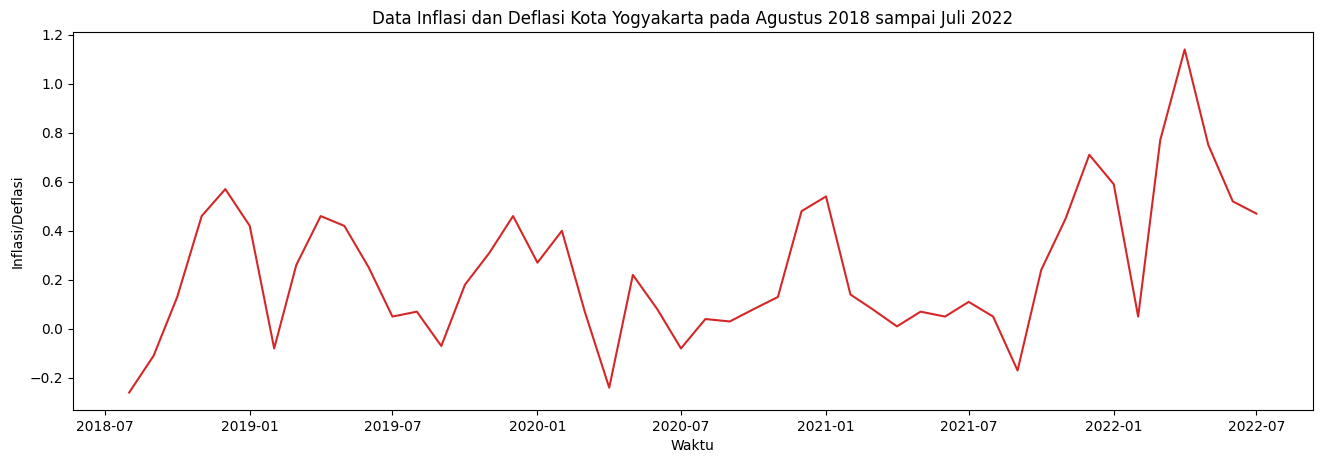

In [ ]:
def plot_df(df, x, y, title="", xlabel='Waktu', ylabel='Inflasi/Deflasi', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Waktu'], y=df['Inflasi'], title='Data Inflasi dan Deflasi Kota Yogyakarta pada Agustus 2018 sampai Juli 2022')    


Terlihat grafik data sudah stasioner. Namun, untuk memastikan akan digunakan Augmented Dickey Fuller test (ADH Test).

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Inflasi'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.659973323115725
p-value: 0.004712718679418789
Critial Values:
   1%, -3.5778480370438146
Critial Values:
   5%, -2.925338105429433
Critial Values:
   10%, -2.6007735310095064


Uji Stasioneritas (ADH Test)

- Hipotesis
H0 : terdapat unit root sehingga data tidak stasioner
H1 : tidak terdapat unit root sehingga data stasioner

- Taraf Signifikansi
𝛼=5%

- Daerah Kritis
H0 ditolak jika nilai p-value < 𝛼=5%

- Keputusan
Karena diperoleh p-value=0.0011135253070359778 < 𝛼=0.05, maka H0 ditolak.

- Kesimpulan
Pada taraf signifikansi 5%, H0 ditolak karena p-value=0.0011135253070359778< 𝛼=0.05. Sehingga dapat disimpulkan bahwa data inflasi dan deflasi yang telah ditransformasi sudah stasioner.

#

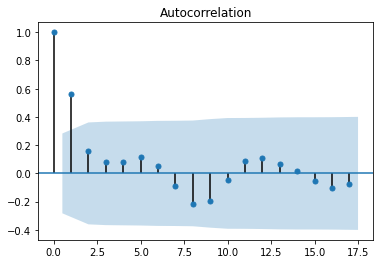

In [ ]:
#Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Inflasi'],alpha=0.05);

Dapat diperhatikan bahwa dari plot ACF diatas, terdapat 2 lag pertama
yang keluar dari interval konfidensi sehingga pemodelan yang
memungkinkan adalah MA(2)

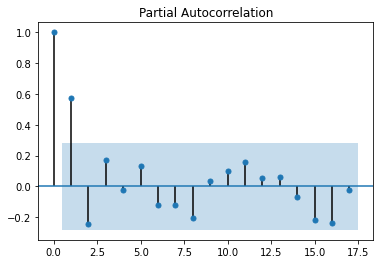

In [ ]:
#plot pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Inflasi'],alpha=0.05);


Dapat diperhatikan bahwa dari plot PACF diatas, terdapat 2 lag pertama yang keluar dari interval konfidensi sehingga pemodelan yang memungkinkan adalah AR(2).

Sehingga, dapat diperoleh pemodelan ARIMA yang mungkin berdasarkan plot ACF dan PACF dengan derajat 𝑝=2,𝑑=0, dan 𝑞=2 adalah
1. AR(2) atau ARIMA(2,0,0)
2. MA(2) atau ARIMA(0,0,2)
3. ARMA(2,2) atau ARIMA(2,0,2)

In [ ]:
#AR(2) atau ARIMA(2,0,0)
from statsmodels.tsa.arima.model import ARIMA
mod1= ARIMA(df['Inflasi'], order=(2,0,0))
res1= mod1.fit()
print(res1.summary())



                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(2, 0, 0)   Log Likelihood                   2.930
Date:                Mon, 10 Oct 2022   AIC                              2.140
Time:                        05:51:29   BIC                              9.625
Sample:                             0   HQIC                             4.969
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2363      0.067      3.536      0.000       0.105       0.367
ar.L1          0.7229      0.122      5.916      0.000       0.483       0.962
ar.L2         -0.2318      0.128     -1.810      0.0

Diperoleh persamaan ARIMA(2,0,0) yaitu $Z_t=0.2363+0.7229Z_{t-1}-0.2318Z_{t-2}+a_t$

Artinya, nilai inflasi dan deflasi pada periode tahun ini ditentukan oleh
0.7229 nilai inflasi dan deflasi 1 tahun lalu,-0.2318 nilai inflasi dan deflasi 2 tahun lalu, serta komponen error pada tahun ini.

In [ ]:
#MA(2) atau ARIMA(0,0,2)
from statsmodels.tsa.arima.model import ARIMA
mod2= ARIMA(df['Inflasi'], order=(0,0,2))
res2= mod2.fit()
print(res2.summary())



                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(0, 0, 2)   Log Likelihood                   4.509
Date:                Mon, 10 Oct 2022   AIC                             -1.018
Time:                        05:51:29   BIC                              6.467
Sample:                             0   HQIC                             1.810
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2379      0.061      3.875      0.000       0.118       0.358
ma.L1          0.9484     78.029      0.012      0.990    -151.987     153.883
ma.L2         -0.0515      4.033     -0.013      0.9

Diperoleh persamaan ARIMA(0,0,2) yaitu $Z_t=0.2379+a_t + 0.9484a_{t-1}-0.0515a_{t-2}$

Artinya, nilai inflasi dan deflasi pada periode tahun ini ditentukan komponen error pada tahun ini, dan 0.9484 komponen error 1 tahun sebelumnya serta -0.0515 komponen error 2 tahun.

In [ ]:
#ARMA(2,2) atau ARIMA(2,0,2)
from statsmodels.tsa.arima.model import ARIMA
mod3= ARIMA(df['Inflasi'], order=(2,0,2))
res3= mod3.fit()
print(res3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   6.124
Date:                Mon, 10 Oct 2022   AIC                             -0.247
Time:                        05:51:30   BIC                             10.980
Sample:                             0   HQIC                             3.996
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.077      3.065      0.002       0.085       0.385
ar.L1         -0.1575      0.772     -0.204      0.838      -1.670       1.355
ar.L2          0.2511      0.250      1.004      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Diperoleh persamaan ARIMA(2,0,2) yaitu $Z_t=0.2350 -0.1575Z_{t-1}+0.2511Z_{t-2}+a_t+1.1001a_{t-1}+0.1006a_{t-2}$

Artinya, nilai inflasi dan deflasi pada periode tahun ini ditentukan oleh -0.1575 nilai inflasi dan deflasi 1 tahun lalu, 0.2511 nilai inflasi dan deflasi 2 tahun lalu, komponen error pada tahun ini, 1.1001 komponen error 1 tahun sebelumnya, dan 0.1006 komponen error 2 tahun sebelumnya.

In [ ]:
#AR(1) atau ARIMA(1,0,0)
from statsmodels.tsa.arima.model import ARIMA
mod4= ARIMA(df['Inflasi'], order=(1,0,0))
res4= mod4.fit()
print(res4.summary())



                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   1.665
Date:                Mon, 10 Oct 2022   AIC                              2.671
Time:                        05:51:30   BIC                              8.284
Sample:                             0   HQIC                             4.792
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2332      0.079      2.969      0.003       0.079       0.387
ar.L1          0.5940      0.117      5.059      0.000       0.364       0.824
sigma2         0.0541      0.011      5.109      0.0

In [ ]:
#MA(1) atau ARIMA(0,0,1)
from statsmodels.tsa.arima.model import ARIMA
mod5= ARIMA(df['Inflasi'], order=(0,0,1))
res5= mod5.fit()
print(res5.summary())



                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                   4.419
Date:                Mon, 10 Oct 2022   AIC                             -2.838
Time:                        05:51:30   BIC                              2.776
Sample:                             0   HQIC                            -0.716
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2376      0.063      3.745      0.000       0.113       0.362
ma.L1          0.9999     21.033      0.048      0.962     -40.225      42.225
sigma2         0.0449      0.945      0.048      0.9

In [ ]:
#ARIMA(1,0,1)
from statsmodels.tsa.arima.model import ARIMA
mod6= ARIMA(df['Inflasi'], order=(1,0,1))
res6= mod6.fit()
print(res6.summary())



                               SARIMAX Results                                
Dep. Variable:                Inflasi   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                   4.556
Date:                Mon, 10 Oct 2022   AIC                             -1.112
Time:                        05:51:30   BIC                              6.372
Sample:                             0   HQIC                             1.716
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.060      3.969      0.000       0.121       0.356
ar.L1         -0.0783      0.149     -0.526      0.599      -0.370       0.214
ma.L1          0.9999     42.554      0.023      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
res4

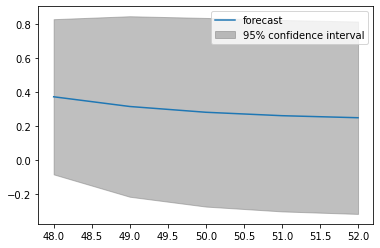

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
x=plot_predict(res4,start=48,end=52)

In [ ]:
forecasts4=res4.forecast(steps=5,alpha=0.5)

In [ ]:
forecasts4

48    0.373865
49    0.316761
50    0.282841
51    0.262694
52    0.250726
Name: predicted_mean, dtype: float64